In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import numpy as np
import ml_metrics as metrics

In [3]:
# Load a subset of data (subset obtained using random sampling)
data = pd.read_csv('C:/Users/fatim/Desktop/Expedia Hotel Recommandation/Data/train.csv')

In [4]:
################### Get missing values for each column ####################
def missing_val(df, num_var):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df['hotel_cluster'].count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(num_var)
    
missing_val(data, 24)

,Total,Percent
orig_destination_distance,370247,0.370247
srch_co,999,0.000999
srch_ci,998,0.000998
channel,0,0.000000
site_name,0,0.000000
posa_continent,0,0.000000
user_location_country,0,0.000000
user_location_region,0,0.000000
user_location_city,0,0.000000
user_id,0,0.000000


In [5]:
################### Replace missing values in the variable 'orig_destination_distance' by the mean ####################
data['orig_destination_distance'].fillna(data['orig_destination_distance'].mean(), inplace=True)

In [6]:
# Concert srch_ci, srch_co and date_time to a datetime type and extract new variables: ci_day, ci_month etc.
def convert_date_into_days(df):
    df['srch_ci'] = pd.to_datetime(df['srch_ci'])
    df['srch_co'] = pd.to_datetime(df['srch_co'])
    df['date_time'] = pd.to_datetime(df['date_time'])
    
    df['stay_duration'] = (df['srch_co'] - df['srch_ci']).astype('timedelta64[D]')
    # For hotel check-in
    # Month, Year, Day
    df['ci_day'] = df["srch_ci"].apply(lambda x: x.day)
    df['ci_month'] = df["srch_ci"].apply(lambda x: x.month)
    df['ci_year'] = df["srch_ci"].apply(lambda x: x.year)
    
convert_date_into_days(data)

In [7]:
# Replace missing values with the most frequent values 
max_ci_day = data['ci_day'].value_counts().index[0]
max_ci_month = data['ci_month'].value_counts().index[0]
max_ci_year = data['ci_year'].value_counts().index[0]
max_st_duration = data['stay_duration'].value_counts().index[0]

data['ci_day'] = data['ci_day'].fillna(max_ci_day)
data['ci_month'] = data['ci_month'].fillna(max_ci_month)
data['ci_year'] = data['ci_year'].fillna(max_ci_year)
data['stay_duration'] = data['stay_duration'].fillna(max_st_duration)

In [8]:
columns = ['date_time', 'srch_ci', 'srch_co']
data.drop(columns=columns,axis=1,inplace=True)

In [9]:
# Keep only te events with a resrevation 
data = data[data['is_booking'] == 1]
print("Number of records without null reservation is {}".format(len(data)))

Number of records without null reservation is 82096


In [10]:
# Split data on a training and test set according to years
data_year = set(data.ci_year.unique())
print('training set contain data for the following years : {}'.format(data_year))

nw_train = data[(data.ci_year == 2014) | (data.ci_year == 2013)]
nw_test = data[data.ci_year == 2015]
print('--------------------------')
print('After splitting: \n - new trainnig data contain {}  records \n - new test data {} records '.format(nw_train.shape[0], nw_test.shape[0]))

training set contain data for the following years : {2016.0, 2013.0, 2014.0, 2015.0}
--------------------------
After splitting: 
 - new trainnig data contain 76683  records 
 - new test data 5412 records 


In [11]:
def barplot(name_variable, figsize , fontsize):
    var_counts = nw_train[str(name_variable)].value_counts()
    plt.figure(figsize=figsize)
    sns.barplot(var_counts.index, var_counts.values, palette='deep')
    plt.title('Répartition de la variable ' + str(name_variable) , fontsize = fontsize)
    plt.ylabel('Nombre d\'occurrences', fontsize=fontsize)
    plt.xlabel(str(name_variable), fontsize=fontsize)
    plt.show()

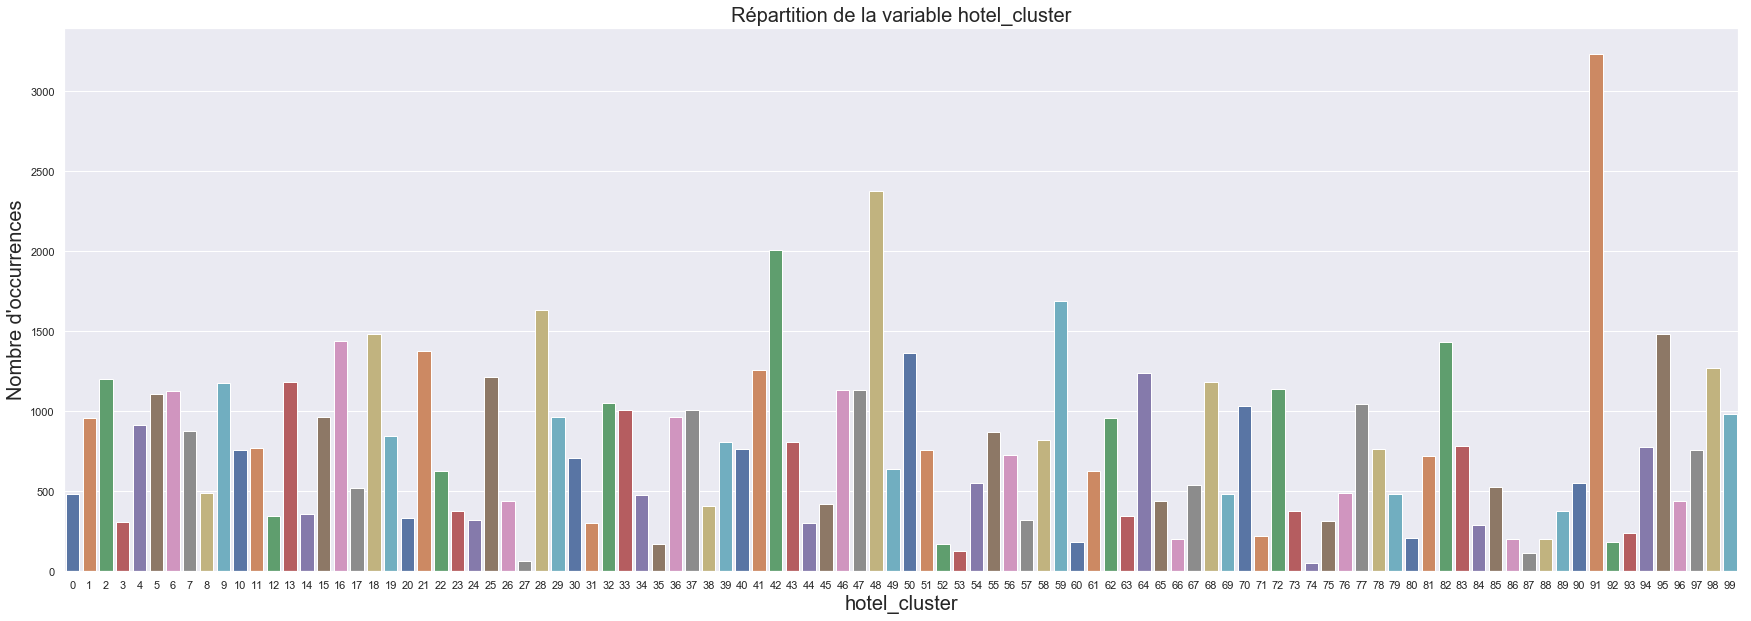

In [12]:
barplot(name_variable='hotel_cluster', figsize = (30,10), fontsize = 20)

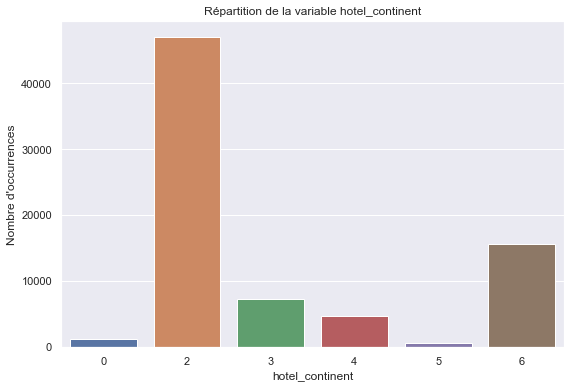

In [13]:
barplot(name_variable='hotel_continent', figsize=(9,6), fontsize=12)

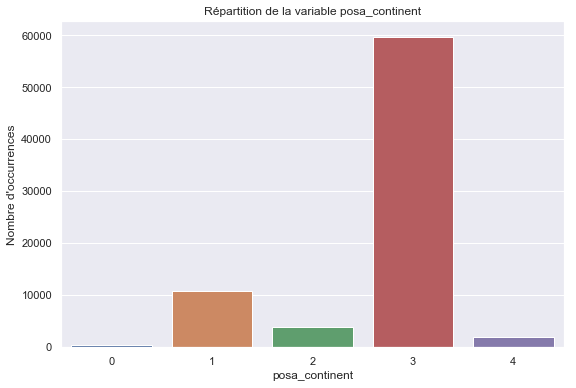

In [14]:
barplot(name_variable='posa_continent', figsize=(9,6), fontsize=12)

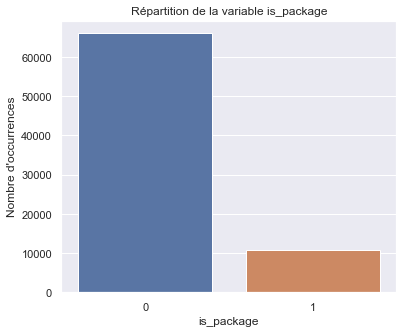

In [15]:
barplot(name_variable='is_package', figsize=(6,5), fontsize=12)

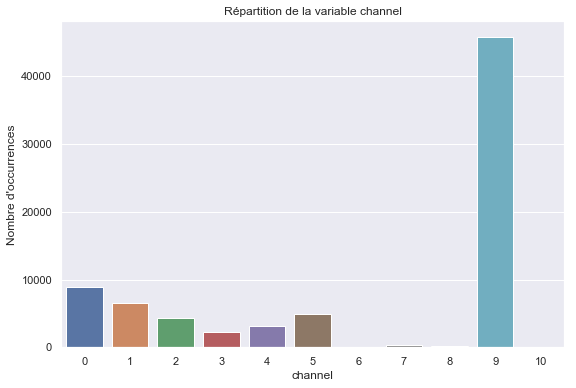

In [16]:
barplot(name_variable='channel', figsize=(9,6), fontsize=12)

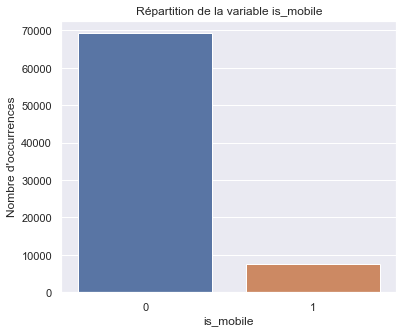

In [17]:
barplot(name_variable='is_mobile', figsize=(6,5), fontsize=12)

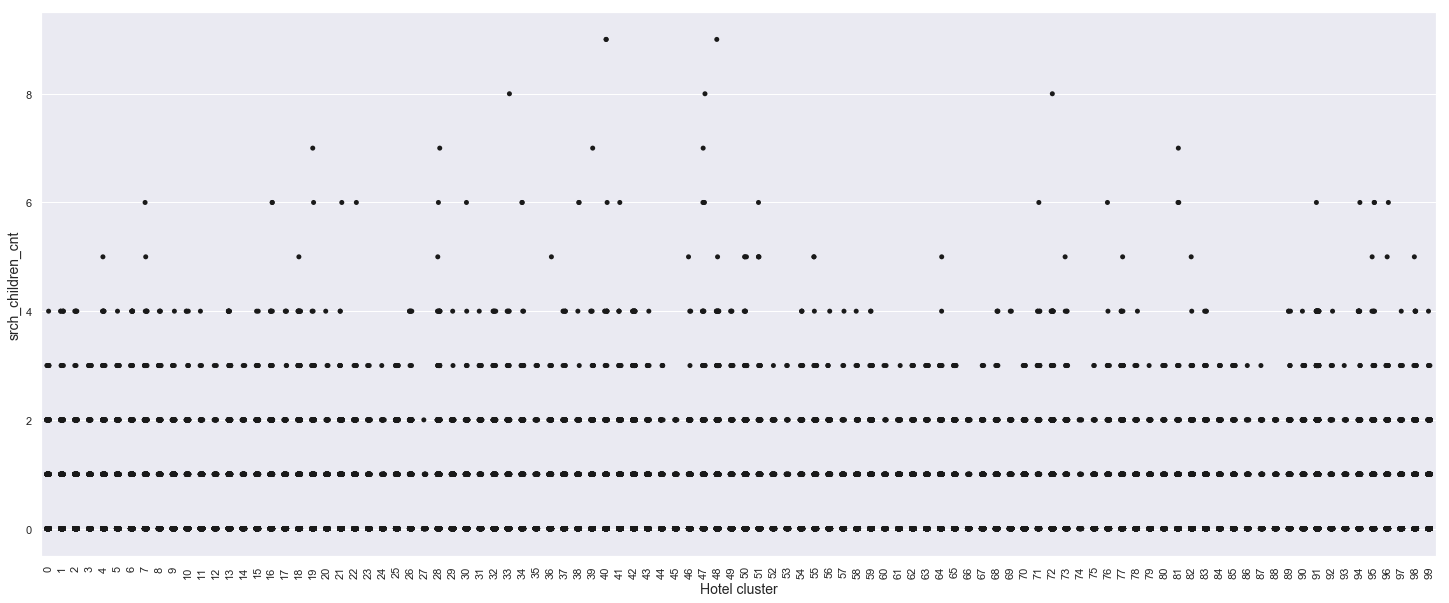

In [19]:
fig, ax = plt.subplots(figsize=(25,10))
g = sns.catplot(x='hotel_cluster', y='srch_children_cnt', data=nw_train, color= 'k', ax=ax)

for a in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

ax.set_xlabel("Hotel cluster",fontsize=14)
ax.set_ylabel("srch_children_cnt",fontsize=14)
plt.xticks(rotation=90)
plt.clf()
plt.close()

In [20]:
b1 = nw_train[['srch_adults_cnt','srch_children_cnt','srch_rm_cnt']]
b1.describe()

,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,76683.000000,76683.000000,76683.000000
mean,1.842677,0.271951,1.127655
std,0.894926,0.647413,0.467305
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000
50%,2.000000,0.000000,1.000000
75%,2.000000,0.000000,1.000000
max,9.000000,9.000000,8.000000


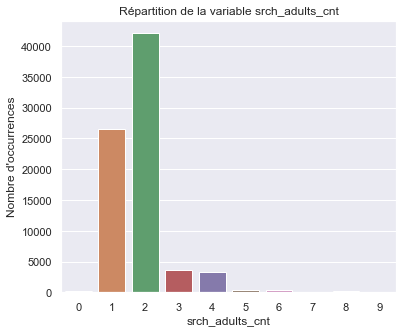

In [21]:
barplot(name_variable='srch_adults_cnt', figsize=(6,5), fontsize=12)

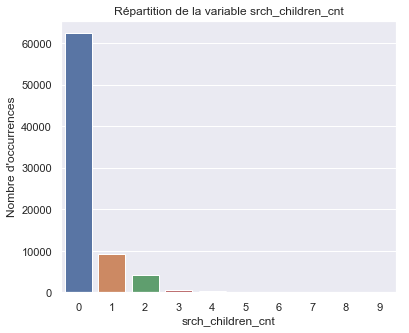

In [22]:
barplot(name_variable='srch_children_cnt', figsize=(6,5), fontsize=12)

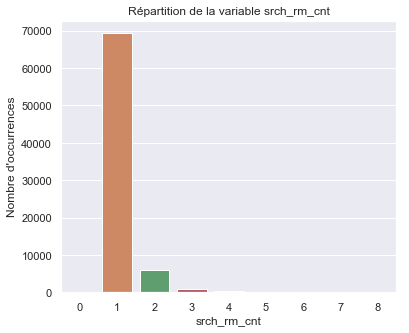

In [23]:
barplot(name_variable='srch_rm_cnt', figsize=(6,5), fontsize=12)

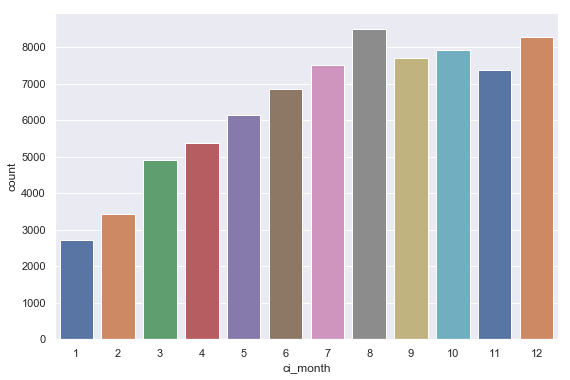

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
sns.countplot('ci_month',data=nw_train[nw_train["is_booking"] == 1],order=list(range(1,13)), palette='deep',ax=ax)

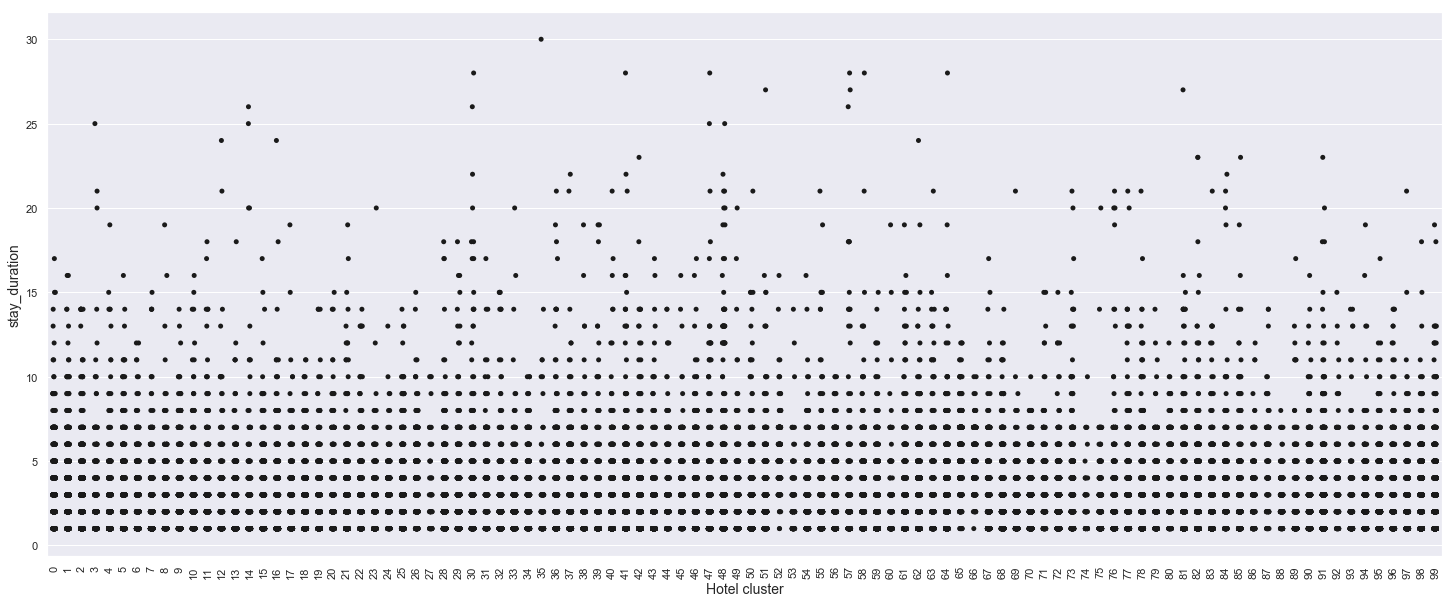

In [31]:
fig, ax = plt.subplots(figsize=(25,10))
g = sns.catplot(x='hotel_cluster', y='stay_duration', data=nw_train, color= 'k', ax=ax)

for a in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

ax.set_xlabel("Hotel cluster",fontsize=14)
ax.set_ylabel("stay_duration",fontsize=14)
plt.xticks(rotation=90)
plt.clf()
plt.close()

In [32]:
nw_train.to_csv('nw_train.csv')
nw_test.to_csv('nw_test.csv')

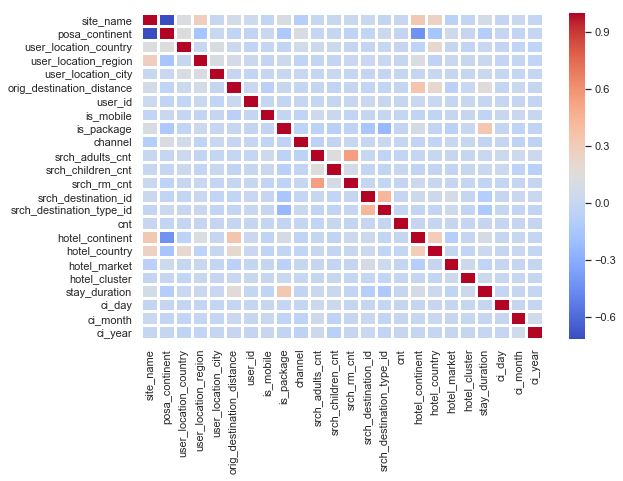

In [33]:
nw_train_corr = nw_train.drop(columns=['is_booking'])
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
sns.heatmap(nw_train_corr.corr(),cmap='coolwarm',ax=ax,annot=False,linewidths=2)

C:\Users\fatim\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


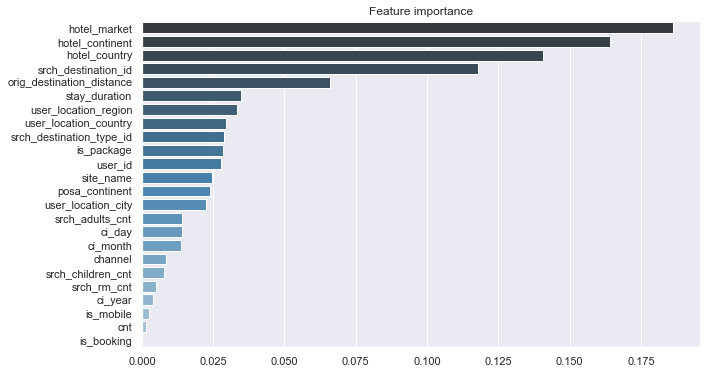

In [34]:
from sklearn.ensemble import RandomForestClassifier
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}

drop = ['hotel_cluster']
x, y = nw_train.drop(drop,axis=1), nw_train['hotel_cluster']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

## PCA on destinations.csv
The competition doesn't tell us exactly what each latent feature is, but it's safe to assume that it's some combination of destination characteristics, like name, description, and more. These latent features were converted to numbers, so they could be anonymized.

We can use the destination information as features in a machine learning algorithm, but we'll need to compress the number of columns down first, to minimize runtime. We can use PCA to do this. PCA will reduce the number of columns in a matrix while trying to preserve the same amount of variance per row. Ideally, PCA will compress all the information contained in all the columns into less, but in practice, some information is lost.

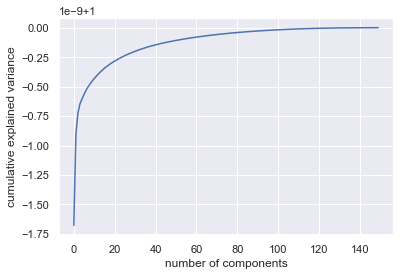

In [35]:
destinations = pd.read_csv('C:/Users/fatim/Desktop/Expedia Hotel Recommandation/Data/destinations.csv')
from sklearn.decomposition import PCA

pca = PCA().fit(destinations)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


pca = PCA(n_components=20)
dest_small = pca.fit_transform(destinations[["d{0}".format(i + 1) for i in range(149)]])
dest_small = pd.DataFrame(dest_small)
dest_small["srch_destination_id"] = destinations["srch_destination_id"]

nw_traindest = nw_train.merge(dest_small, on="srch_destination_id")

nw_testdest = nw_test.merge(dest_small, on="srch_destination_id")


In [36]:
nw_traindest.to_csv('nw_traindest.csv')
nw_testdest.to_csv('nw_testdest.csv')

In [4]:
# Use when runing the notebook for the first time after quiting
nw_traindest = pd.read_csv('nw_traindest.csv')
nw_testdest = pd.read_csv('nw_testdest.csv')

# Modelistion : 
## Most popular cluster


In [3]:
# Get the most common clusters
most_common_clusters = list(nw_traindest.hotel_cluster.value_counts().head().index)
# Predict the most 5 popuular clutser for the whole test set
predictions = [most_common_clusters for i in range(nw_testdest.shape[0])]
target = [[l] for l in nw_testdest["hotel_cluster"]]

print('Precision (map@5) using the most popular clusters : {}'.format(metrics.mapk(target,predictions, k=5)))

Precision (map@5) using the most popular clusters : 0.04890945348040132
